# Step 1 - Gather data

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import json
import random
%matplotlib inline

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

imagep_df = pd.read_csv('image-predictions.tsv', sep="\t")
imagep_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
tweets_list = []
with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)

In [7]:
tweets_df = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [8]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Step 2 - Accessing Dataset

In [9]:
#checking the structure of the DataFrames
twitter_archive_df.shape, imagep_df.shape, tweets_df.shape

((2356, 17), (2075, 12), (2354, 3))

## Accessing Twitter Archive

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### The following columns have missing data and since the are ids, they will be dropped
> in_reply_to_status_id and in_reply_to_user_id have 78 records
> retweeted_status_id,  retweeted_status_user_id and retweeted_status_timestamp have 181 records
> The expanded urls will also be dropped, as we have another column in imagep_df containing the image url

In [12]:
twitter_archive_df['timestamp'].sample()

390    2017-01-31 01:27:39 +0000
Name: timestamp, dtype: object

#### This column will be converted to datetime datatype

In [13]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### These rows will have to be clean to extract the text from the anchor tag

In [14]:
twitter_archive_df['text'].sample(10)

2113    Meet Hank and Sully. Hank is very proud of the...
1367    This is Sansa. She's gotten too big for her ch...
690     This is Moose. He's rather h*ckin dangerous (y...
832     Say hello to Oakley and Charlie. They're convi...
214     This is Iggy. He was a rescue dog killed in th...
155     RT @dog_rates: "Good afternoon class today we'...
161     Meet Lorenzo. He's an avid nifty hat wearer an...
359     RT @dog_rates: This is Loki. He smiles like El...
542     We only rate dogs. Please stop sending in non-...
1947    Large blue dog here. Cool shades. Flipping us ...
Name: text, dtype: object

#### This column alone does not offer any stories, we will combine it with the rating numerator and denominator and see what we can find

In [15]:
#increase the width of the columns
pd.set_option('display.max_colwidth', 500)

In [16]:
twitter_archive_df[['text', 'rating_numerator', 'rating_denominator']].sample(20)

,text,rating_numerator,rating_denominator
212,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,10,10
1186,Get you a pup that can do both. 10/10 https://t.co/zSbyvm62xZ,10,10
1856,Meet Sammy. He's a Motorola Firefox. Hat under hoodie (must be a half-decent up and coming white rapper) 10/10 https://t.co/rO2zxf0OQ0,10,10
1225,"I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",10,10
1734,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,9,10
1369,This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd,13,10
1394,This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1,9,10
1500,This is Edgar. He's a Sassafras Puggleflash. Nothing satisfies him. Not since the war. 10/10 cheer up pup https://t.co/1NgMb9BTWB,10,10
318,Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg,13,10
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


#### While visually accessing the above table, some text value like "we only rate dogs" indicated that there are images that are not dog images

In [17]:
 twitter_archive_df[twitter_archive_df['text'].str.match('.*only rate dog')].index

Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

#### these indexes will be dropped

In [18]:
twitter_archive_df[['doggo','floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

#### Since the four columns above are stages of dogs, we will have to combine then into one columns dog stages

### Accessing Imagep_df

In [19]:
imagep_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### The columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine to two columns, dog breed and confidence and, since our analysis is about dog tweets, the img_num in this dataset will be drop , as it will not impact our analysis

### Accessing tweets_df

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### this dataset appears clean, butwe will have to conver the id to tweets_id

# Summary

#### Quality
1.  The following columns had missing values  and they were be dropped as they will not impact our analysis
- in_reply_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
2. The timestamp column is in the wrong data type and was converted to datetime
3. The source column had text in an anchor tag and we need to extract only the text
4. There were tweets that are not about dogs in the text column, this will be dropped
5. The expanded urls column is not needed for our analysis, it will be dropped
6. The none value in doggo, floofer, pupper, will be dropped
7. drop the rating_denominator and rename rating_numerator as dog_rating
8. any non dog image in the imagep_df will be dropped
9. rename id in the tweets df as tweets_id



#### Tidyness
1. These columns doggo, floofer, pupper and puppo will be combined into one
2. These columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine into two columns, dog breed and confidence

# Step 3  - Cleaning Data

#### Define
1.  The following columns with missing values will be dropped
  - in_reply_status_id
  - in_reply_to_user_id
  - retweeted_status_id
  - retweeted_status_user_id
  - retweeted_status_timestamp

#### Code

In [22]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp']

def drop_col(cols, dataframe):
    for col in cols:
        dataframe.drop(columns=col, axis=1, inplace=True)

drop_col(columns, twitter_archive_df)

#### Test

In [23]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define
- Convert timestamp to datetime

#### Code

In [24]:
twitter_archive_df['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'])

#### Test

In [25]:
twitter_archive_df['timestamp'].dtypes

datetime64[ns, UTC]

#### Define
> extract text from anchor tags in the source column

#### Code

In [26]:
twitter_archive_df.source = twitter_archive_df.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [27]:
twitter_archive_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Define
> drop all tweets in rows that are not about dogs

#### Code

In [28]:
tweets_not_dogs =  twitter_archive_df[twitter_archive_df['text'].str.match('.*only rate dog')].index

def drop_row(rows, dataframe):
    for row in rows:
        dataframe.drop(row, axis=0, inplace=True)

drop_row(tweets_not_dogs, twitter_archive_df)

#### Test

In [29]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2292 non-null   int64              
 1   timestamp           2292 non-null   datetime64[ns, UTC]
 2   source              2292 non-null   object             
 3   text                2292 non-null   object             
 4   expanded_urls       2233 non-null   object             
 5   rating_numerator    2292 non-null   int64              
 6   rating_denominator  2292 non-null   int64              
 7   name                2292 non-null   object             
 8   doggo               2292 non-null   object             
 9   floofer             2292 non-null   object             
 10  pupper              2292 non-null   object             
 11  puppo               2292 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
> drop expnaded urls column

#### Code

In [30]:
column = ['expanded_urls']

drop_col(column, twitter_archive_df)

#### Test

In [31]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2292 non-null   int64              
 1   timestamp           2292 non-null   datetime64[ns, UTC]
 2   source              2292 non-null   object             
 3   text                2292 non-null   object             
 4   rating_numerator    2292 non-null   int64              
 5   rating_denominator  2292 non-null   int64              
 6   name                2292 non-null   object             
 7   doggo               2292 non-null   object             
 8   floofer             2292 non-null   object             
 9   pupper              2292 non-null   object             
 10  puppo               2292 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 214.9+ KB


#### Define
> doggo, floofer, pupper, puppo will be combined as dod_stages
> and the none values will be drop

#### Code

In [32]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [33]:
#create the column in twitter archive and replace none with nan
twitter_archive_df[dog_stages] = twitter_archive_df[dog_stages].replace('None', np.nan)

In [34]:
def join_all(x):
    return ', '.join(x.dropna().astype(str))

twitter_archive_df['dog_stages'] = twitter_archive_df[dog_stages].apply(join_all, axis=1)

In [35]:
#replace empty string with nan
twitter_archive_df['dog_stages'] = twitter_archive_df['dog_stages'].replace('', np.nan)

In [36]:
#drop the four column: doggo, floofer, pupper, puppo
drop_col(dog_stages, twitter_archive_df)

#### Test

In [37]:
twitter_archive_df.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

#### Define
> delete the rating_denominator column
> rename rating_numerator as dog_rating

#### Code

In [38]:
#drop rating_denominator
column = ['rating_denominator']

drop_col(column, twitter_archive_df)

In [39]:
#rename rating_numerator as dog_rating
twitter_archive_df.columns = ['tweet_id', 'timestamp', 'source', 'text', 'dog_rating', 'name', 'dog_stages']

#### Test

In [40]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2292 non-null   int64              
 1   timestamp   2292 non-null   datetime64[ns, UTC]
 2   source      2292 non-null   object             
 3   text        2292 non-null   object             
 4   dog_rating  2292 non-null   int64              
 5   name        2292 non-null   object             
 6   dog_stages  380 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 143.2+ KB


#### Define
>

In [41]:
# setup the conditions for selection
criteria = [(imagep_df['p1_dog'] == True),(imagep_df['p2_dog'] == True), (imagep_df['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breed = [imagep_df['p1'], imagep_df['p2'], imagep_df['p3']]

# set the choice order for confidence level based on the selection conditions
confidence = [imagep_df['p1_conf'], imagep_df['p2_conf'], imagep_df['p3_conf']]

# select the predicted breed based on the first successful condition
imagep_df['breed'] = np.select(criteria, breed, default = 'none')

# select the predicted confidence level based on the first successful condition
imagep_df['confidence'] = np.select(criteria, confidence, default = 0)

In [42]:
columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num']

drop_col(columns, imagep_df)

#### Test

In [43]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       2075 non-null   object 
 3   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


#### Define
> rename id as tweet_id in the tweets dataframe

#### Code

In [44]:
tweets_df.columns = ['tweet_id', 'retweet_count','favorite_count']

#### Test

In [45]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Combining the dataset

In [46]:
twitter_archive_clean = pd.merge(twitter_archive_df, tweets_df, on= 'tweet_id', how='left')

In [47]:
twitter_archive_clean = pd.merge(twitter_archive_clean, imagep_df, on='tweet_id', how='inner')

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2017 non-null   int64              
 1   timestamp       2017 non-null   datetime64[ns, UTC]
 2   source          2017 non-null   object             
 3   text            2017 non-null   object             
 4   dog_rating      2017 non-null   int64              
 5   name            2017 non-null   object             
 6   dog_stages      321 non-null    object             
 7   retweet_count   2015 non-null   float64            
 8   favorite_count  2015 non-null   float64            
 9   jpg_url         2017 non-null   object             
 10  breed           2017 non-null   object             
 11  confidence      2017 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(6)
memory usage: 204.9+ KB


In [49]:
twitter_archive_clean.describe()

,tweet_id,dog_rating,retweet_count,favorite_count,confidence
count,2.017000e+03,2017.000000,2015.000000,2015.000000,2017.000000
mean,7.377102e+17,12.316311,2901.388089,8358.986600,0.461254
std,6.773480e+16,41.259223,5002.108178,11928.118661,0.339663
min,6.660209e+17,0.000000,16.000000,0.000000,0.000000
25%,6.760895e+17,10.000000,619.000000,1616.000000,0.133033
50%,7.105889e+17,11.000000,1374.000000,3798.000000,0.451697
75%,7.931204e+17,12.000000,3341.000000,10538.500000,0.772685
max,8.924206e+17,1776.000000,79515.000000,132810.000000,0.999956


#### The max value in the dog_trating is too large compared to the 25, 50 and 75 percentile

## checking dog_rating for outliers

In [50]:
twitter_archive_clean['dog_rating'].quantile(0.99)

14.0

#### Define
> all dog_rating greater than 14 will be dropped

#### Code

In [51]:
max_quantile = twitter_archive_clean['dog_rating'].quantile(0.99)

In [52]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['dog_rating'] <= 14]

#### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 2016
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1997 non-null   int64              
 1   timestamp       1997 non-null   datetime64[ns, UTC]
 2   source          1997 non-null   object             
 3   text            1997 non-null   object             
 4   dog_rating      1997 non-null   int64              
 5   name            1997 non-null   object             
 6   dog_stages      320 non-null    object             
 7   retweet_count   1995 non-null   float64            
 8   favorite_count  1995 non-null   float64            
 9   jpg_url         1997 non-null   object             
 10  breed           1997 non-null   object             
 11  confidence      1997 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(6)
memory usage: 202.8+ KB


In [54]:
twitter_archive_clean.describe()

,tweet_id,dog_rating,retweet_count,favorite_count,confidence
count,1.997000e+03,1997.000000,1995.000000,1995.000000,1997.000000
mean,7.377874e+17,10.591888,2912.753885,8391.857644,0.460968
std,6.787663e+16,2.201110,5023.153770,11974.780140,0.339492
min,6.660209e+17,0.000000,16.000000,0.000000,0.000000
25%,6.758884e+17,10.000000,619.000000,1606.500000,0.133033
50%,7.102833e+17,11.000000,1373.000000,3804.000000,0.451697
75%,7.931506e+17,12.000000,3351.000000,10663.000000,0.771984
max,8.924206e+17,14.000000,79515.000000,132810.000000,0.999956


# Step 4 - Data Storage

#### Define
> store the cleaned dataframe in sqlite datatbase

#### Code

In [55]:
import sqlite3
import sqlalchemy

In [56]:
conn = sqlite3.connect('WeRateDogs.db')

In [57]:
engine = sqlalchemy.create_engine('sqlite:///WeRateDogs.db')

In [58]:
twitter_archive_clean.to_sql('twitter_archive_master', engine, if_exists='replace', index=False)

1997

#### Test

In [59]:
pd.read_sql('SELECT * FROM twitter_archive_master', engine)

,tweet_id,timestamp,source,text,dog_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,None,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none,0.000000
1,892177421306343426,2017-08-01 00:17:27.000000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,None,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03.000000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,None,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51.000000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,None,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24.000000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,None,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,666049248165822465,2015-11-16 00:24:50.000000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,None,None,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
1993,666044226329800704,2015-11-16 00:04:52.000000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,a,None,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
1994,666033412701032449,2015-11-15 23:21:54.000000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,a,None,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
1995,666029285002620928,2015-11-15 23:05:30.000000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,a,None,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


# Step 5 - Analyzing and Visualizing Data

In [60]:
#set look and fell of plots
sb.set(rc={"figure.figsize":(12, 8)})

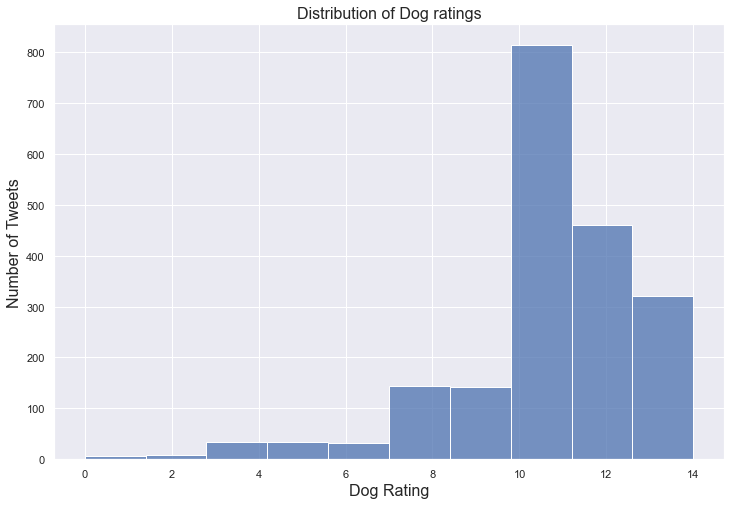

In [61]:
sb.histplot(data=twitter_archive_clean, x='dog_rating', bins=10)
plt.title('Distribution of Dog ratings', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Dog Rating', fontsize = 16);

## This distribution is skewed to the right

## What is the top source users tweeted from tweets

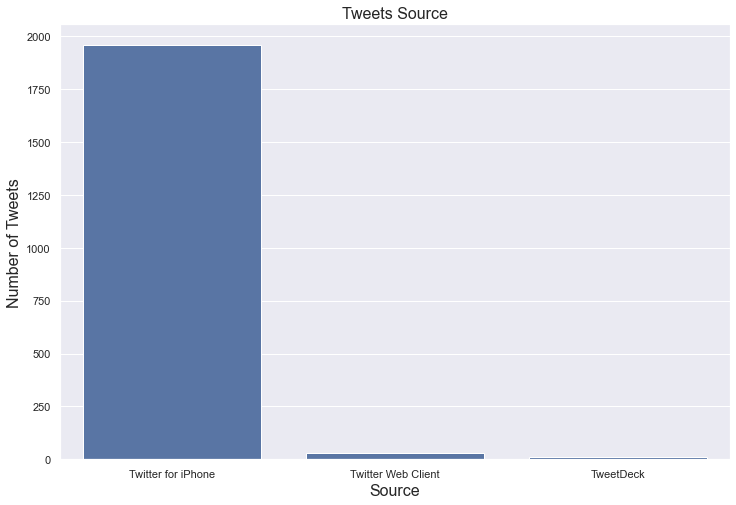

In [62]:
color_base = sb.color_palette()[0]
sb.countplot(data=twitter_archive_clean, x='source', color=color_base)
plt.title('Tweets Source', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Source', fontsize = 16);

## Iphone users accounts for almost all the dog tweets

## The top 10 most popular dog breed in the tweets

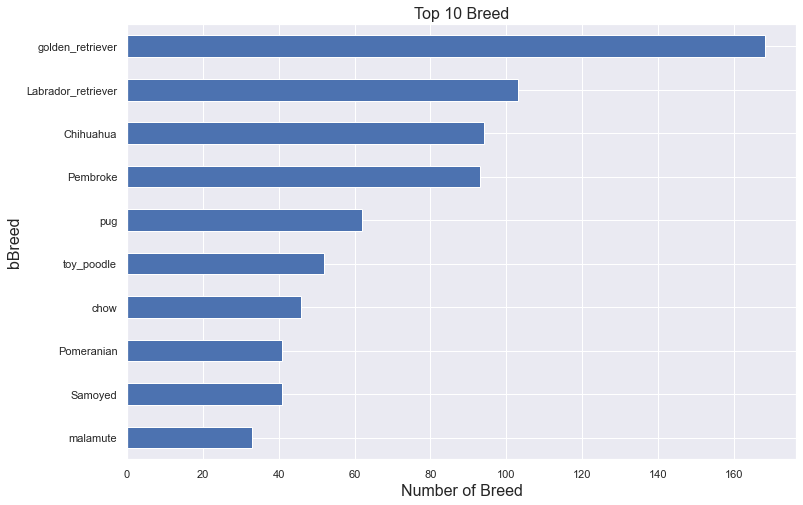

In [63]:
dog_breed = twitter_archive_clean[twitter_archive_clean['breed']!='none']['breed'].value_counts().head(10)

dog_breed.plot(kind='barh')
plt.title('Top 10 Breed', fontsize = 16)
plt.ylabel('bBreed', fontsize = 16)
plt.xlabel('Number of Breed', fontsize = 16)
plt.gca().invert_yaxis();

#### The top most comon  breed among the dogs is Golden Retriever followed by Labrador Retriever and Chihuahua

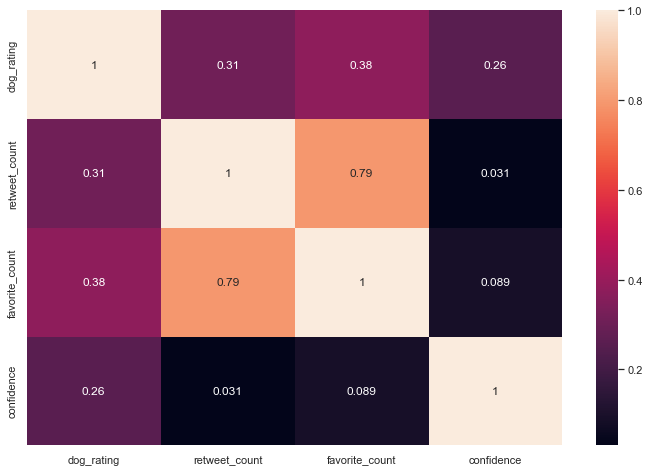

In [66]:
sb.heatmap(twitter_archive_clean[['dog_rating', 'retweet_count', 'favorite_count', 'confidence']].corr(), annot=True);

## favorite_count has positive correlation with retweet_counts

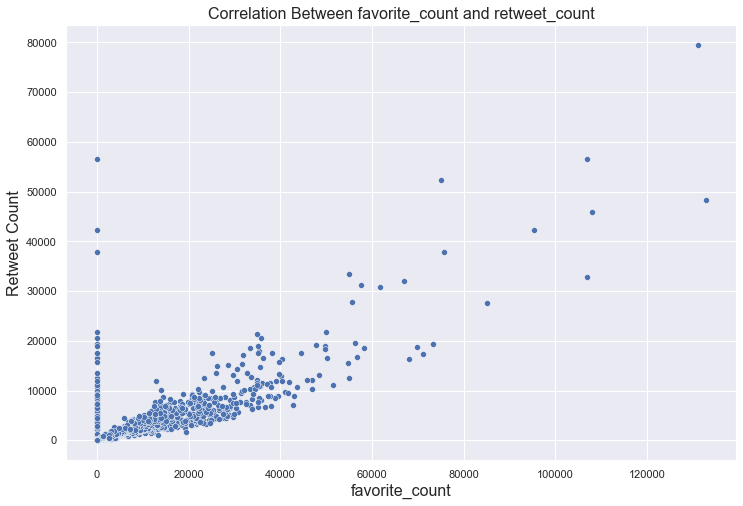

In [66]:
sb.scatterplot(data=twitter_archive_clean, x="favorite_count", y="retweet_count")
plt.title('Correlation Between favorite_count and retweet_count', fontsize = 16)
plt.ylabel('Retweet Count', fontsize = 16)
plt.xlabel('favorite_count', fontsize = 16);

### Trend analysis of tweets (Retweet_counts and Favorite_count)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


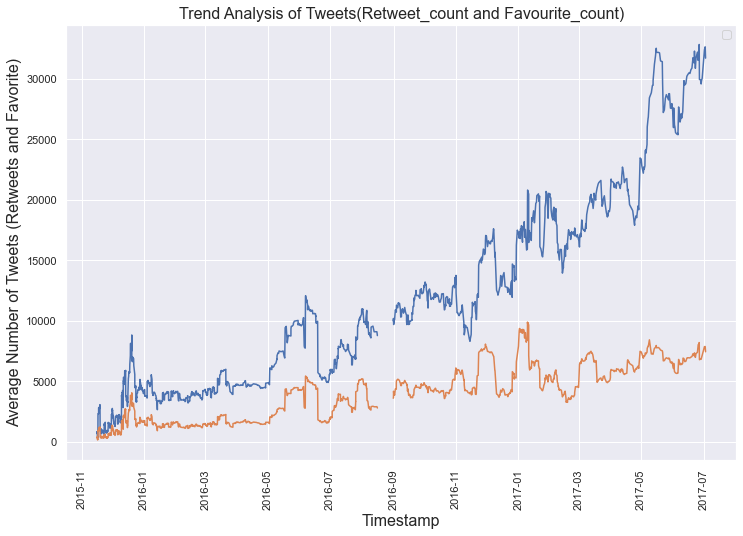

In [68]:
def trend_analysis():
    y1 = twitter_archive_clean['favorite_count'].rolling(window =30).mean()
    y2 = twitter_archive_clean['retweet_count'].rolling(window = 30).mean()
    x = twitter_archive_clean['timestamp']
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.title('Trend Analysis of Tweets(Retweet_count and Favourite_count)', fontsize = 16)
    plt.xlabel('Timestamp', fontsize = 16)
    plt.ylabel('Average Number of Tweets (Retweets and Favorite)', fontsize = 16)
    plt.xticks(rotation=90)
    plt.legend(loc='best');

trend_analysis()
    

### The plot above show how retweets and f

### Which dog is the top rated dog based on retweets

In [69]:
top_dog_retweeted = twitter_archive_clean[twitter_archive_clean['retweet_count'] ==twitter_archive_clean['retweet_count'].max()]

In [70]:
top_dog_retweeted['jpg_url']

823    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

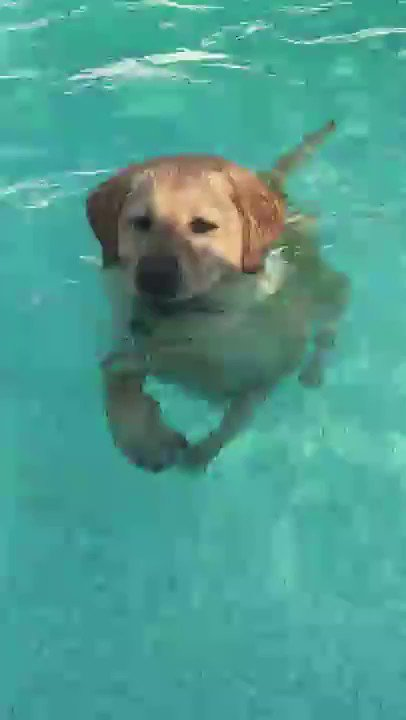

In [71]:
from IPython import display
display.Image('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

#### This is the dog image that won based on retweets 

### Which dog is the top rated dog based on favorite count

In [72]:
top_dog_fovorite = twitter_archive_clean[twitter_archive_clean['favorite_count'] ==twitter_archive_clean['favorite_count'].max()]
top_dog_fovorite['jpg_url']

315    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

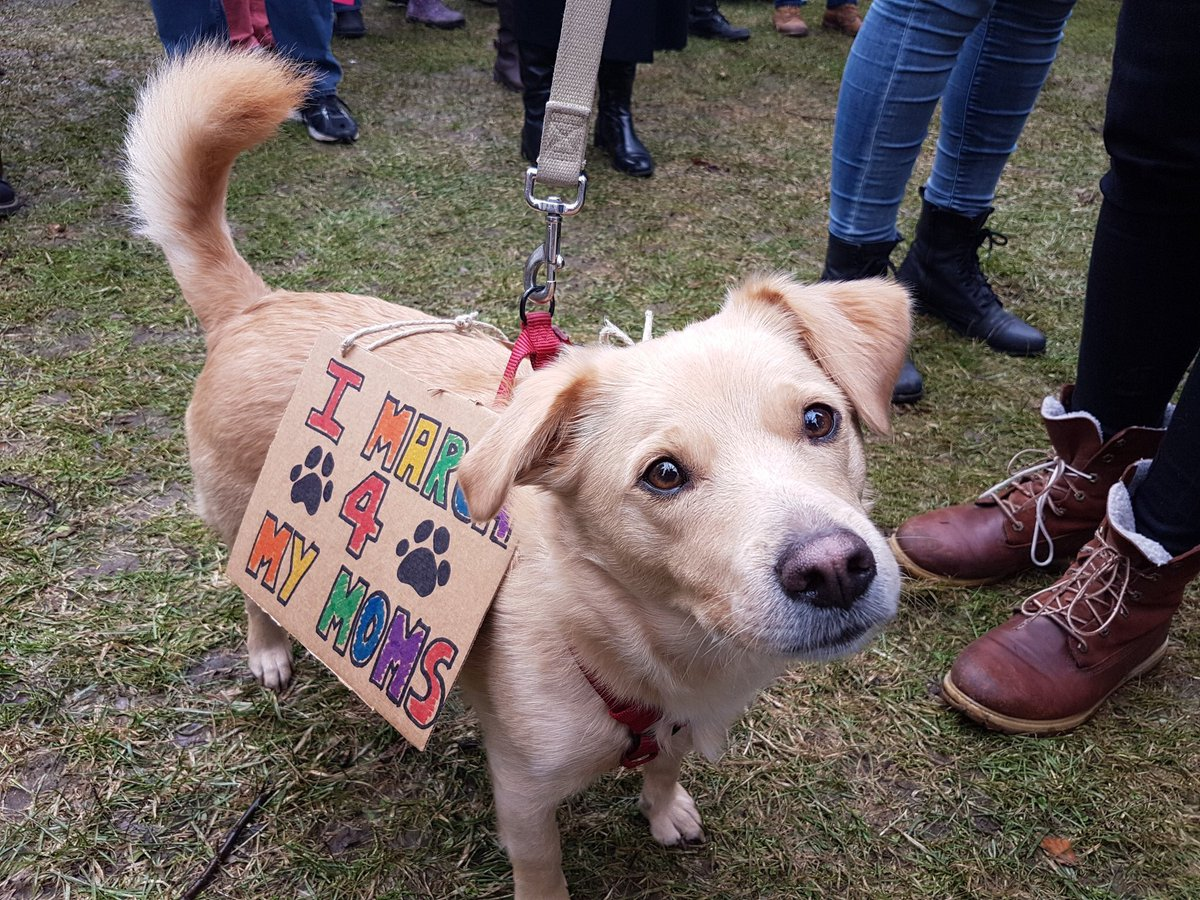

In [73]:
display.Image('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

### This dog image won based on favorite count